In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [116]:
# reading the CSV file on which to work
teams = pd.read_csv("teams.csv")

In [117]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [118]:
# Filtering out the columns that are relevant to us for this project

teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [119]:
# checking correlation between 'Medals' and other columns, to figure out the best pair for parameters
# The closest to 1, the better the parameter will be

teams.corr()["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

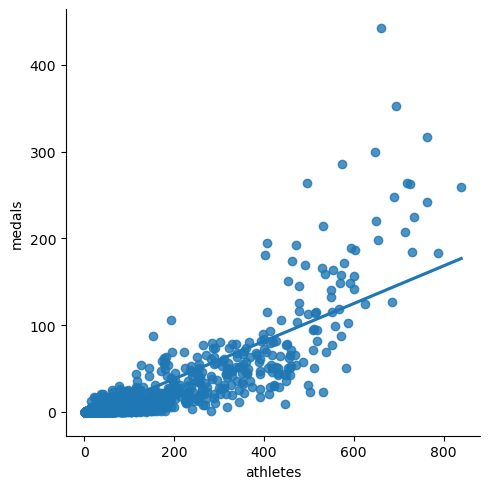

In [120]:
# We can plot the data on graph for visualisation using MatPlotLib
# 'athletes' and 'prev_medals' are plotted against 'medals'

x = teams["athletes"]
y = teams["medals"]

''' 1st implementation with matplotlib

plt.scatter(x, y)
'''
# 2nd implementation with matplotlib

# plt.xlabel('athletes')
# plt.ylabel('medals')
# plt.scatter(x = 'athletes', y = 'medals', data = teams)
# m, b = np.polyfit(x, y, 1)
# plt.plot(x, m*x+b, color = 'red')

# Implementation with Seaborn
sns.lmplot(x = "athletes", y = "medals", data = teams, fit_reg = True, ci = None)

# Data Cleaning - identify missing values
teams[teams.isnull().any(axis=1)]

# Drop missing values
teams = teams.dropna()


In [121]:
# Splitting the data for Training Data and Testing Data
# Last two years to be made testing data

train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

train.shape

(1609, 7)

In [122]:
test.shape

(405, 7)

In [123]:
reg = LinearRegression()

In [124]:
predictors = ["athletes", "prev_medals"]
target =  ["medals"] 

In [125]:
# Pass in the predictors from training dataset and target
reg.fit(train[predictors], train[target])

LinearRegression()

In [126]:
# Make predictions on predictors from test dataset

predictions = reg.predict(test[predictors])

In [127]:
# Tabular view
test["predictions"] = predictions

In [128]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [129]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [130]:
test["predictions"] = test["predictions"].round()

In [131]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [132]:
# Absolute error

error = mean_absolute_error(test["medals"], test["predictions"])


In [133]:
# Value of mean absolute error
error

3.2987654320987656

In [136]:
# To determine if the mean absolute error value is reasonable or not
# The mean absolute error should be lower than std (Standard Deviation)
# In this case, the mean absolute error has a reasonable value

teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [138]:
# To see the predictions of a certain country

test[test["team"] == "USA"] 

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [139]:
test[test["team"] == "RUS"]

,team,country,year,athletes,age,prev_medals,medals,predictions
1666,RUS,Russia,2012,549,25.4,142.0,140,144.0
1667,RUS,Russia,2016,406,25.4,140.0,115,132.0
